<h2 align="center">Measures Of Central Tendency and Dispersion</h2>

### 3.1: Descriptive Vs Inferential Statistics
- Inferential statistics involve making predictions or drawing conclusions about a population based on a sample.
- Descriptive statistics are used to summarize and describe data, providing an overview of its main characteristics.

### 3.2, 3.3: Measures of Central Tendency: Mean, Median, Mode and Percentile
- Mean – Synonym for Average.
- Median – Middle value of a dataset when it is ordered in ascending order. If the dataset has an even number of values, the median is the average of the two middle values.
- Mode – Most frequently occurring data value.
- Percentile is a statistical measure used to rank a value within a dataset, indicating what percentage of the data falls below or is equal to that value.

### 3.4: Shoe Sales Analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load Data
df = pd.read_csv("../data/shoe_sales.csv")
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [3]:
df.shape

(60, 3)

In [4]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


We see 12.25 in 25% percentile which means 25% of total values are less than 12.25

In [5]:
df.sold_qty[df.sold_qty<12.25].shape

(15,)

- Total values = 60
- 25% of total values = 60*0.25 = 15
- Hence you see 15 above when you use 25% percentile value (which is 12.25) to filter the data

- Now let's do some min, max analysis
- Minimum sales quantity is 7 whereas max is 689. There is a possibility it can be an outlier. 
- We will first separate these values out as per the brand and then do some basic plotting to figure out whats going on

In [6]:
# Nike sales analysis
df_nike = df[df.brand=="Nike"]
df_nike.shape

(30, 3)

In [7]:
df_nike.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
4,9/3/2023,Nike,18.0
6,9/4/2023,Nike,22.0
8,9/5/2023,Nike,20.0


In [8]:
# Handle NA values
df_nike.isnull().sum()

date        0
brand       0
sold_qty    2
dtype: int64

In [9]:
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [10]:
## Now how should we fill NA values for sold_qty? Using median is one way
val = round(df_nike.sold_qty.median())
val

20

In [13]:
df_nike.sold_qty.fillna(val, inplace=True)

C:\Users\sweanand\AppData\Local\Temp\ipykernel_18520\3809410123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.sold_qty.fillna(val, inplace=True)


In [14]:
df_nike.isnull().sum()

date        0
brand       0
sold_qty    0
dtype: int64

In [15]:
df_nike.sold_qty.sum()

590.0

##### Nike Shoe Sales Insights
1. On average we sell 20 nike shoes per day
2. The daily sales range is 14 to 25
3. In september month we sold 590 adidas shoes

### 3.7: Measures of Dispersion (Variability): Range, IQR
- "IQR" and "Range" also referred to as measures of dispersion or variability.
- Range, calculated as Maximum Value - Minimum Value, reflects data spread.
- Unlike Range, IQR (Inter Quartile Range) is less influenced by outliers, making it a robust measure.
- Quartile Q1, Q2, and Q3 correspond to the 25th, 50th, and 75th percentiles, respectively.
- The 50th percentile is commonly known as the median.
- IQR is the difference between Q3 and Q1 showing the spread of the middle 50% of data.

### 3.8: Box and whisker plot
- Box/Whisker Plots provide a visual summary of the central tendency, spread, and presence of outliers in a dataset.
- The "box" in a Box Plot shows the middle 50% of the data, with the line inside representing the median. It gives insights into the central data values and their spread.
- The "whiskers" in a Box Plot show the minimum and maximum values within a specific range.

### 3.9: Outlier Treatment using IQR and Box plot
- The Interquartile Range (IQR) is determined by subtracting the first quartile (Q1) from the third quartile (Q3).
  - lower_limit = (Q1 - (1.5 * IQR))
  - upper_limit = (Q3 + (1.5 * IQR))

In [1]:
import pandas as pd

df = pd.read_csv("../data/heights.csv")
df.head()

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [2]:
Q1, Q3 = df.height.quantile([0.25,0.75])
Q1, Q3

(5.3500000000000005, 6.275)

In [3]:
IQR = Q3-Q1
IQR

0.9249999999999998

In [4]:
# Find lower and upper boundries for outlier detection
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
lower, upper

(3.962500000000001, 7.6625)

In [5]:
df[(df.height<lower)|(df.height>upper)]

,name,height
0,mohan,1.2
19,Liu,40.2


Above shows two outliers in our dataset.

##### Outlier detection using box plot

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# make sure to install openpyxl using "pip install openpyxl" before running below code
df = pd.read_excel("../data/region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [8]:
labels = df['Region'].unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [9]:
plot_data = [df['Sales'][df['Region'] == label].values for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896], dtype=int64),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895], dtype=int64),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387], dtype=int64)]

C:\Users\sweanand\AppData\Local\Temp\ipykernel_24320\479961180.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=labels, vert=True, patch_artist=True)


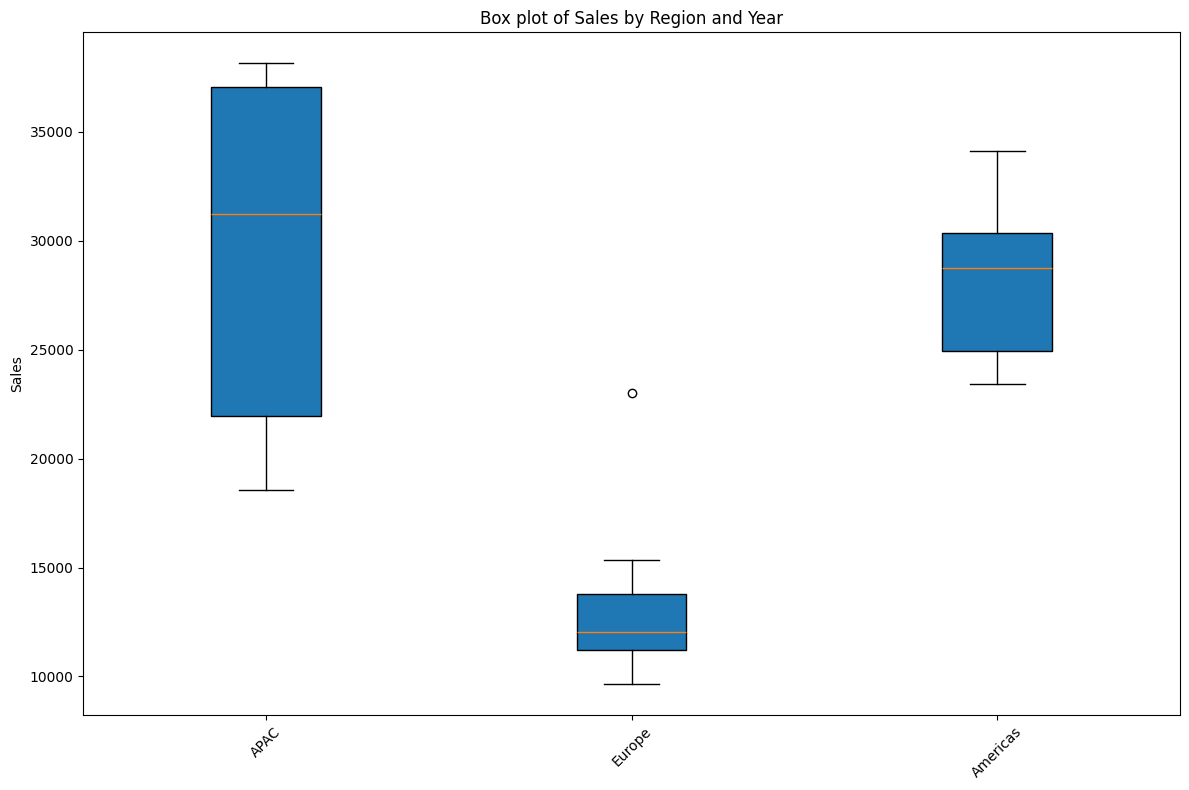

In [10]:
plt.figure(figsize=(12, 8))
plt.boxplot(plot_data, labels=labels, vert=True, patch_artist=True)
plt.title('Box plot of Sales by Region and Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

You can clearly see an outlier point above Europe box plot. This shows how one can use a box plot to spot outliers

### 3.12: Measures of Dispersion: Variance and Standard Deviation

- Variance is a measure of how spread out a distribution is. It means How far each number is from every other number in a dataset. It is calculated as the average of the squared differences from the mean.
- The smaller the variance, the less spread out the data is. Conversely, the larger the variance, the more spread out the data is.
- Standard deviation is a measure of the amount of variation or dispersion of a set of values. It is calculated as the square root of the variance.
- The smaller the standard deviation, the closer the data points are to the mean. Conversely, the larger the standard deviation, the more spread out the data points are.
- The stock market's volatility is the best use case for variance and standard deviation.

In [12]:
import pandas as pd
df = pd.read_csv("../data/stock_returns.csv")
df.head()

,year,nvidia_returns,reliance_returns
0,2016,122.14,47.43
1,2017,83.91,12.09
2,2018,-50.03,-13.63
3,2019,82.19,22.42
4,2020,125.84,62.59


In [13]:
df.describe()

,year,nvidia_returns,reliance_returns
count,7.000000,7.000000,7.000000
mean,2019.000000,66.164286,24.980000
std,2.160247,59.611670,25.412166
min,2016.000000,-50.030000,-13.630000
25%,2017.500000,49.550000,11.175000
50%,2019.000000,82.190000,22.420000
75%,2020.500000,103.025000,40.565000
max,2022.000000,125.840000,62.590000


In [14]:
df.nvidia_returns.std(), df.nvidia_returns.var()

(59.61166995847453, 3553.551195238095)

In [15]:
df.reliance_returns.std(), df.reliance_returns.var()

(25.41216637754444, 645.7782000000001)

### 3.14,15: Correlation and Causation

- Correlation is a statistical measure that shows the degree to which two variables are related.
- A correlation coefficient can range from -1 to 1.
- -1 (perfect negative correlation) < 0 (no correlation) < 1 (perfect positive correlation)
- Correlation: A statistical relationship between two variables, where changes in one variable are associated with changes in another, but it does not imply causation.
- Causation: A cause-and-effect relationship between variables, where changes in one variable directly lead to changes in another.